In [1]:
!pip install spacy -q

^C


In [1]:
# Import libraries
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import spacy

# TruncatedSVD from sklearn
from sklearn.decomposition import TruncatedSVD

In [2]:
data = pd.read_csv("data_clothing.csv")
data

,description,id
0,Active classic boxers - There's a reason why o...,1
1,Active sport boxer briefs - Skinning up Glory ...,2
2,Active sport briefs - These superbreathable no...,3
3,"Alpine guide pants - Skin in, climb ice, switc...",4
4,"Alpine wind jkt - On high ridges, steep ice an...",5
...,...,...
880,MEN'S BACK-TO-BERKELEY III SPORT BOOTS - Combi...,881
881,WOMEN'S METALLIC BASE CAMP SLIDES III - Harnes...,882
882,WOMEN'S BASE CAMP SLIDES III - Harnessing mesh...,883
883,MEN'S TNF X ELVIRA TRIARCH SLIDES - Easy comfo...,884


In [3]:
data.drop_duplicates(inplace=True,subset="description")

In [4]:
data.reset_index(drop = True, inplace = True) 

In [5]:
data.index.tolist()

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [6]:
test =[t.split(" - ")for t in data.description.tolist()]
test =[t[0] for t in test]
data["description_bis"] = test

In [7]:
data

,description,id,description_bis
0,Active classic boxers - There's a reason why o...,1,Active classic boxers
1,Active sport boxer briefs - Skinning up Glory ...,2,Active sport boxer briefs
2,Active sport briefs - These superbreathable no...,3,Active sport briefs
3,"Alpine guide pants - Skin in, climb ice, switc...",4,Alpine guide pants
4,"Alpine wind jkt - On high ridges, steep ice an...",5,Alpine wind jkt
...,...,...,...
877,MEN'S BACK-TO-BERKELEY III SPORT BOOTS - Combi...,881,MEN'S BACK-TO-BERKELEY III SPORT BOOTS
878,WOMEN'S METALLIC BASE CAMP SLIDES III - Harnes...,882,WOMEN'S METALLIC BASE CAMP SLIDES III
879,WOMEN'S BASE CAMP SLIDES III - Harnessing mesh...,883,WOMEN'S BASE CAMP SLIDES III
880,MEN'S TNF X ELVIRA TRIARCH SLIDES - Easy comfo...,884,MEN'S TNF X ELVIRA TRIARCH SLIDES


## On ajoute une colonne qui correspond au text nettoyé

In [8]:
# Preprocessing
data['description_clean'] =data['description'].str.replace(r"<br>|</br>|<li>|</li|<ul>|</ul>|<b>|</b>|oz", " ")

#data['description_clean'] = data['description_clean'].str.replace(r"[^A-Za-z0-9]+", " ")
data['description_clean'] = data['description_clean'].str.replace(r"[^A-Za-z]+", " ")
data['description_clean'] = data['description_clean'].str.replace(r"recycling|recycled|common|Threads|threads|Common|Recyclable|Recycling|Recycled|Fabric|fabric|soft|Soft", " ")
data['description_clean'] = data['description_clean'].fillna('').apply(lambda x: x.lower())
data['description_clean'] = data['description_clean'].str.replace(r" t | h ", " ")
data

C:\Users\vanes\AppData\Local\Temp/ipykernel_106608/61655076.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data['description_clean'] =data['description'].str.replace(r"<br>|</br>|<li>|</li|<ul>|</ul>|<b>|</b>|oz", " ")
C:\Users\vanes\AppData\Local\Temp/ipykernel_106608/61655076.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  data['description_clean'] = data['description_clean'].str.replace(r"[^A-Za-z]+", " ")
C:\Users\vanes\AppData\Local\Temp/ipykernel_106608/61655076.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  data['description_clean'] = data['description_clean'].str.replace(r"recycling|recycled|common|Threads|threads|Common|Recyclable|Recycling|Recycled|Fabric|fabric|soft|Soft", " ")
C:\Users\vanes\AppData\Local\Temp/ipykernel_106608/61655076.py:8: FutureWarning: The default value of regex will change from True to False

,description,id,description_bis,description_clean
0,Active classic boxers - There's a reason why o...,1,Active classic boxers,active classic boxers there s a reason why our...
1,Active sport boxer briefs - Skinning up Glory ...,2,Active sport boxer briefs,active sport boxer briefs skinning up glory re...
2,Active sport briefs - These superbreathable no...,3,Active sport briefs,active sport briefs these superbreathable no f...
3,"Alpine guide pants - Skin in, climb ice, switc...",4,Alpine guide pants,alpine guide pants skin in climb ice switch to...
4,"Alpine wind jkt - On high ridges, steep ice an...",5,Alpine wind jkt,alpine wind jkt on high ridges steep ice and a...
...,...,...,...,...
877,MEN'S BACK-TO-BERKELEY III SPORT BOOTS - Combi...,881,MEN'S BACK-TO-BERKELEY III SPORT BOOTS,men s back to berkeley iii sport boots combini...
878,WOMEN'S METALLIC BASE CAMP SLIDES III - Harnes...,882,WOMEN'S METALLIC BASE CAMP SLIDES III,women s metallic base camp slides iii harnessi...
879,WOMEN'S BASE CAMP SLIDES III - Harnessing mesh...,883,WOMEN'S BASE CAMP SLIDES III,women s base camp slides iii harnessing mesh f...
880,MEN'S TNF X ELVIRA TRIARCH SLIDES - Easy comfo...,884,MEN'S TNF X ELVIRA TRIARCH SLIDES,men s tnf x elvira triarch slides easy comfort...


## on ajoute une colonne le text tokenisé

In [9]:
!python -m spacy download en -q

Traceback (most recent call last):
  File "C:\Users\vanes\anaconda3\lib\runpy.py", line 194, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\vanes\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\vanes\anaconda3\lib\site-packages\spacy\__main__.py", line 4, in <module>
    setup_cli()
  File "C:\Users\vanes\anaconda3\lib\site-packages\spacy\cli\_util.py", line 71, in setup_cli
    command(prog_name=COMMAND)
  File "C:\Users\vanes\anaconda3\lib\site-packages\click\core.py", line 829, in __call__
    return self.main(*args, **kwargs)
  File "C:\Users\vanes\anaconda3\lib\site-packages\typer\core.py", line 778, in main
    return _main(
  File "C:\Users\vanes\anaconda3\lib\site-packages\typer\core.py", line 190, in _main
    args = click.utils._expand_args(args)
AttributeError: module 'click.utils' has no attribute '_expand_args'


In [10]:
import en_core_web_sm
nlp = en_core_web_sm.load()

In [11]:
 #"ve","g","blend","provide" 
#"comfort","protection","iii","hiking","hike","men","women","baby","organic","cotton","organic"
nlp.Defaults.stop_words.remove("top")
nlp.Defaults.stop_words |= {"detail","brim","zipper","zip","pocket","pockets","weight","nylon","spandex","coverage","program","details","g","ve","s","iii","men","women","cotton","fit"}

In [12]:
from spacy.lang.en.stop_words import STOP_WORDS

# tokenization

data['description_tokenized'] = data['description_clean'].fillna('').apply(lambda x: nlp(x))
# remove stop-words

data['description_tokenized']= data['description_tokenized'].apply(lambda x: [token.lemma_ for token in x if token.text not in STOP_WORDS])


data['description_tokenized']

0      [active, classic, boxer, reason, boxer, cult, ...
1      [active, sport, boxer, brief, skin, glory, req...
2      [active, sport, brief, superbreathable, fly, b...
3      [alpine, guide, pant, skin, climb, ice, switch...
4      [alpine, wind, jkt, high, ridge, steep, ice, a...
                             ...                        
877    [berkeley, sport, boot, combine, suede, upper,...
878    [metallic, base, camp, slide, harnessing, mesh...
879    [base, camp, slide, harnessing, mesh, foam, st...
880    [tnf, x, elvira, triarch, slide, easy, comfort...
881    [base, camp, slide, harnessing, mesh, foam, st...
Name: description_tokenized, Length: 882, dtype: object

## Ensuite on transforme notre objet tokenisé sous forme de liste en un texte unique

In [13]:
data['nlp_ready'] =[' '.join(data['description_tokenized'].iloc[i]) for i in range(len(data['description_tokenized']))]

In [14]:
data.head()

,description,id,description_bis,description_clean,description_tokenized,nlp_ready
0,Active classic boxers - There's a reason why o...,1,Active classic boxers,active classic boxers there s a reason why our...,"[active, classic, boxer, reason, boxer, cult, ...",active classic boxer reason boxer cult favorit...
1,Active sport boxer briefs - Skinning up Glory ...,2,Active sport boxer briefs,active sport boxer briefs skinning up glory re...,"[active, sport, boxer, brief, skin, glory, req...",active sport boxer brief skin glory require mo...
2,Active sport briefs - These superbreathable no...,3,Active sport briefs,active sport briefs these superbreathable no f...,"[active, sport, brief, superbreathable, fly, b...",active sport brief superbreathable fly brief m...
3,"Alpine guide pants - Skin in, climb ice, switc...",4,Alpine guide pants,alpine guide pants skin in climb ice switch to...,"[alpine, guide, pant, skin, climb, ice, switch...",alpine guide pant skin climb ice switch rock t...
4,"Alpine wind jkt - On high ridges, steep ice an...",5,Alpine wind jkt,alpine wind jkt on high ridges steep ice and a...,"[alpine, wind, jkt, high, ridge, steep, ice, a...",alpine wind jkt high ridge steep ice alpine ja...


In [15]:
[' '.join(data['description_tokenized'].iloc[i]) for i in range(len(data['description_tokenized']))]

['active classic boxer reason boxer cult favorite cool especially sticky situation quick dry lightweight underwear take minimal space travel pack expose brush waistband offer skin   ness panel construction traditional boxer classic functional fly    polyester moisture wicke performance inseam size m           silky capilene    ultralight breathable quick dry expose brush elastic waistband comfort panel construction traditional boxer inseam size m       polyester gladiodor natural odor control garment           mexico',
 'active sport boxer brief skin glory require movement boxer decide poach route form fit active sport boxer brief breathable polyester      fast wicking dry quickly stretch seamless waistband    leg edge win roll bind gussete flat sew inseam size m offset prevent inner thigh chafe fly free smooth panel           stretch mesh provide support open weave mesh airflow wick efficiently dry fast seamless construction flat sew gusseted inseam set forward prevent inner thigh cha

## EXEMPLE

In [16]:
data.nlp_ready.loc[7]

'tnf citystreet beanie feel warm snug cold weather get'

In [17]:
data.description_clean.loc[7]

'tnf citystreet beanie feel warm and snug however cold the weather gets'

In [18]:
data.description.loc[7]

'TNF CITYSTREET BEANIE - Feel warm and snug, however cold the weather gets'

In [19]:
print(nlp.Defaults.stop_words)

{'g', 'make', 'seemed', 'seem', 'n’t', 'spandex', 'six', 'full', '‘s', 'then', 'twelve', 'move', 'less', 'across', 'will', 'because', 'neither', 'seems', 'even', 'is', 'until', 'zipper', 'to', 'thereupon', 'somewhere', 'beside', 'wherein', 'hence', 'up', 'detail', 'both', 'last', 'the', 'either', 'hereby', 'everything', 'others', 'nevertheless', '’re', 'has', 'whence', 'me', 'ever', 'though', '‘re', 'no', 'other', 'details', 'using', 'upon', '‘ve', 'that', 'serious', 'but', 'had', 'regarding', 'first', 'put', 'not', 'often', 'yourselves', 'please', 'just', 'quite', 'almost', '’ll', 'we', '‘d', '’d', 'indeed', 'rather', 'every', 'same', 'pockets', 'become', 'along', 'via', 'what', 'during', 'besides', 'keep', 'anywhere', "n't", 'so', 'throughout', 'being', 'anyway', 'back', 'three', 'for', 'have', 'him', 'again', 'most', 'whereafter', 'pocket', 'ours', 'without', 'might', 'which', 'see', 'also', 'very', 'they', 'who', 'became', 'iii', 'anything', '’m', 'cannot', 'everywhere', 'well', 'r

## TF-IDF vector

In [20]:
vectorizer = TfidfVectorizer(stop_words='english', smooth_idf=True)
X = vectorizer.fit_transform(data['nlp_ready'])

X_dense_1 = X.toarray()

X_dense_1

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [21]:
import pandas as pd
# Create a tf-idf matrix for each token and each document

data_Xdense = pd.DataFrame(X_dense_1,columns=[x for x in vectorizer.get_feature_names_out()])
#print(data_dense.loc[0][data.loc[0]!=0].sort_values(ascending =False))
data_Xdense            

,abandon,ability,able,aboutaday,abrasion,abrasive,abroad,absolute,absorb,absorption,...,zinger,zip,zipped,zipper,zippered,zippers,zipping,zips,zone,zumu
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.070380,0.288243,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.103323,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
877,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
878,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
879,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
880,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


In [22]:
vectorizer.get_feature_names_out()[0:10]# donne les labels des variables

array(['abandon', 'ability', 'able', 'aboutaday', 'abrasion', 'abrasive',
       'abroad', 'absolute', 'absorb', 'absorption'], dtype=object)

## DBSCAN

In [23]:
from sklearn.cluster import DBSCAN
import numpy as np

# Instanciate DBSCAN 


import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio

# setting Jedha color palette as default
pio.templates["jedha"] = go.layout.Template(
    layout_colorway=["#4B9AC7", "#4BE8E0", "#9DD4F3", "#97FBF6", "#2A7FAF", "#23B1AB", "#0E3449", "#015955"]
)
pio.templates.default = "jedha"
pio.renderers.default = "svg" 


##  Recherche du eps à optimiser à l'aide du NearestNeighbors()

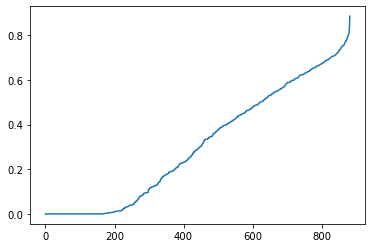

In [24]:
%matplotlib inline
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import numpy as np

neigh = NearestNeighbors(n_neighbors=7,metric='cosine')
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances);

In [25]:
print(indices)

[[  0  27 653 ...   1  26 654]
 [  1   2   0 ...  27 653 467]
 [  2   1 654 ... 371 175 316]
 ...
 [874 881 879 ... 804 878 861]
 [880 753 805 ... 721 319 601]
 [874 881 879 ... 804 878 861]]


In [26]:
import numpy as np

# on cherche les bon paramètres pour le DBSCAN
# Instanciate DBSCAN 
dico1 = {}

for v in np.arange(0.725,0.740,0.001):

    db = DBSCAN(eps=v, min_samples=7, metric="cosine")
    modele = db.fit(X)
    dataframe_counts = pd.DataFrame(modele.labels_).value_counts()
    dico1[v]=dataframe_counts

pd.DataFrame(dico1)

,0.725,0.726,0.727,0.728,0.729,0.730,0.731,0.732,0.733,0.734,0.735,0.736,0.737,0.738,0.739,0.740
0,,,,,,,,,,,,,,,,
-1,190,184,181,179.0,177.0,177.0,175.0,174.0,167.0,162.0,154.0,154.0,152.0,151.0,148.0,148.0
0,201,68,68,70.0,70.0,70.0,71.0,72.0,72.0,72.0,72.0,73.0,73.0,73.0,73.0,330.0
1,274,202,202,222.0,222.0,222.0,223.0,222.0,222.0,223.0,250.0,249.0,257.0,257.0,257.0,294.0
2,65,273,276,276.0,278.0,278.0,279.0,279.0,281.0,285.0,289.0,289.0,290.0,291.0,294.0,61.0
3,60,60,60,60.0,60.0,60.0,60.0,61.0,61.0,61.0,61.0,61.0,61.0,61.0,61.0,8.0
4,8,8,8,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,24.0
5,24,24,24,24.0,24.0,24.0,24.0,24.0,24.0,24.0,24.0,24.0,24.0,24.0,24.0,8.0
6,8,8,8,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,9.0
7,7,7,7,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,9.0,9.0,9.0,NaN


## application du DBSCAN avec eps optimiser

In [27]:
db = DBSCAN(eps=0.734, min_samples=7, metric="cosine") # 0.728 min = 7
modele = db.fit(X)
modele.labels_

array([ 0,  0,  0,  1,  1,  6,  2,  2,  2,  2,  1,  1,  9,  1,  1, -1,  1,
        2, -1,  2,  2,  0,  1,  1,  1, -1,  0,  0,  1,  0,  0,  0,  0,  0,
       -1,  2,  2,  0,  3,  1,  1,  1,  1,  1,  1,  1,  1,  3,  1, -1, -1,
        2,  2, -1,  3,  1,  1,  1,  1,  1,  1,  4,  1,  1,  1,  1,  0,  2,
        1,  1,  1,  3, -1,  3,  1,  0,  0,  1,  3,  3,  3,  1,  8,  1,  3,
        4,  1,  3,  3,  3,  6, -1,  2, -1, -1,  0, -1,  5,  5,  5,  0, -1,
       -1, -1,  2,  1,  1,  1,  1,  5,  2, -1,  5,  5,  5,  1,  1,  1,  1,
        1,  3,  1,  1,  3, -1,  2,  8,  3,  3,  1,  0,  0,  1,  2,  1,  1,
        1,  1, -1,  1, -1, -1, -1, -1,  1,  3,  0,  1,  1,  1,  2,  3, -1,
        3, -1, -1,  8, -1,  1, -1,  2,  1,  1, -1,  1,  1,  6, -1, -1, -1,
        3,  3, -1,  1, -1, -1,  2,  2, -1, -1,  1,  3, -1,  1,  1,  5,  6,
        7,  3,  3,  7,  7, -1,  1,  0,  1,  1,  1,  8,  1, -1, -1, -1,  2,
       -1, -1,  1,  3,  1,  3,  3,  8,  2,  0,  0,  0,  0,  0,  1,  2,  0,
        3,  3,  1,  1, -1

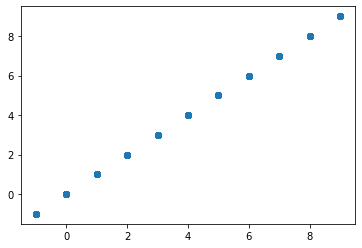

In [28]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

y_pred = modele.fit_predict(X,[X])
plt.scatter(y_pred ,modele.labels_)

## Attribution des labels à chaque ligne ou document du corpus

In [29]:
data_Xdense["label"] = modele.labels_

## Création des groupes à chaque labels

In [30]:
labels =list(set(modele.labels_))
labels

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, -1]

In [31]:
X_0 = data_Xdense[data_Xdense.label == 0]
X_0 

,abandon,ability,able,aboutaday,abrasion,abrasive,abroad,absolute,absorb,absorption,...,zinger,zip,zipped,zipper,zippered,zippers,zipping,zips,zone,zumu
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
647,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
653,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
654,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
657,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
X_1 = data_Xdense[data_Xdense.label == 1]
X_1 

,abandon,ability,able,aboutaday,abrasion,abrasive,abroad,absolute,absorb,absorption,...,zinger,zip,zipped,zipper,zippered,zippers,zipping,zips,zone,zumu
3,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.070380,0.288243,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.103323,0.000000,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.058741,0.000000,0.0,0.0,0.0,0.0,0.0
11,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.294993,0.0,0.0,0.0,0.0,0.0
13,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
639,0.0,0.0,0.0,0.0,0.081042,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.056936,0.0,0.0,0.0,0.0,0.0
640,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.033736,0.0,0.0,0.0,0.0,0.0
659,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.051608,0.0,0.0,0.0,0.0,0.0
660,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


In [33]:
X_2 = data_Xdense[data_Xdense.label == 2]


In [34]:
X_3 = data_Xdense[data_Xdense.label == 3]
X_3

,abandon,ability,able,aboutaday,abrasion,abrasive,abroad,absolute,absorb,absorption,...,zinger,zip,zipped,zipper,zippered,zippers,zipping,zips,zone,zumu
38,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
47,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
71,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
73,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
628,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
648,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
650,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
651,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
X_4 = data_Xdense[data_Xdense.label == 4]
X_5 = data_Xdense[data_Xdense.label == 5]
X_6 = data_Xdense[data_Xdense.label == 6]
X_7 = data_Xdense[data_Xdense.label == 7]
X_8 = data_Xdense[data_Xdense.label == 8]
X_9 = data_Xdense[data_Xdense.label == 9]
X_10 = data_Xdense[data_Xdense.label == 10]
X_11 = data_Xdense[data_Xdense.label == 11]


## Visualisation avec wordcloud 

In [36]:
!pip install wordcloud -q

In [37]:
# récupération de toutes les colonnes sauf colonne label

liste_colonne = [mot for mot in X_0.columns if mot != "label"]

# Cas de X_0

X_3_initial = X_3[liste_colonne]

#  transformation des proportions des mots dans chaque ligne en liste de mot


X_3_word_list = vectorizer.inverse_transform(X_3_initial.values)

X_3_word = [" ".join(liste)for liste in X_3_word_list]
" ".join(X_3_word)

'adorn artist chafing city community easy environment er free geoff hand illustrate ink inspire lightning liven mcdonough nerve org photograph prevail princess puttanesca remove ring scream scythe seal shirr shot tankini technology urgent word yard artist big create dragoon drop easy environment er favor free geoff gun hand ink lightning mcdonough org pc photograph princess puttanesca quit ring scream seal shirr shot tankini technology urgent watertight waystretch word yard appear artist base canvas create current cycle dependent easy environment er extraordinary fish flow free frenzy hand ink lie maytagge night org permit photograph princess puttanesca rectangular ring sale scream seal shirr shot tankini technology urgent washing word yard add artist artwork block comfort deep depict effect er free global hand iceberg ink nicely org photograph princess puttanesca ring rule scream seal shirr shot tankini urgent warmer wonder wristband yard chafe easy free ink log necessity org photogra

In [38]:
import wordcloud
def visualization_of_words (table):
    liste_colonne = [mot for mot in table.columns if mot != "label"]
    table_initial = table[liste_colonne]
    table_word_list = vectorizer.inverse_transform(table_initial.values)
    table_word = [" ".join(liste)for liste in table_word_list]
    wd = wordcloud.WordCloud()
    cloud = wd.generate(" ".join(table_word))
    plt.imshow(cloud)
    
    
def visualization_of_words_2 (table):
    index = table.index
    text_list = data.nlp_ready[table.index].values
    text= " ".join(text_list)
    wd = wordcloud.WordCloud()
    cloud = wd.generate(text)
    plt.imshow(cloud)
    
    
def visualization_of_words_3 (table):
    index = table.index
    text_list = [list(set(t)) for t in data.nlp_ready[table.index].values]
    text= " ".join(text_list)
    wd = wordcloud.WordCloud()
    cloud = wd.generate(text)
    plt.imshow(cloud)
    
    
    

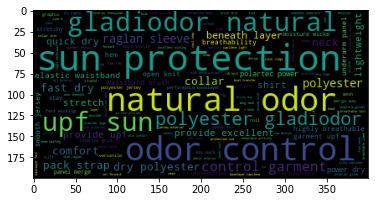

In [39]:
visualization_of_words_2 (X_0) #(fringue qui protège du soleil)

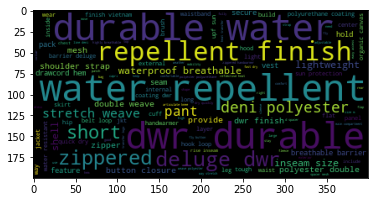

In [40]:
visualization_of_words_2 (X_1) # fringue imperméable

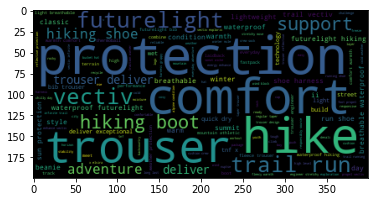

In [41]:
visualization_of_words_2 (X_2)  #(vêtement de randonnée)

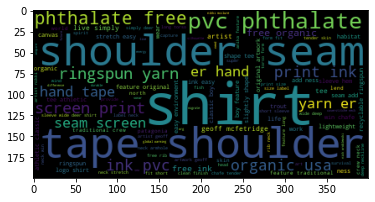

In [42]:
visualization_of_words_2 (X_3) #shirt usa

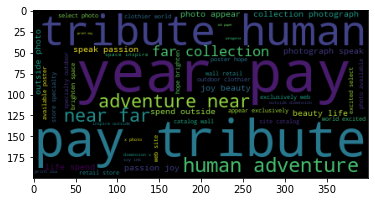

In [43]:
visualization_of_words_2 (X_4) # souvenir,poster 

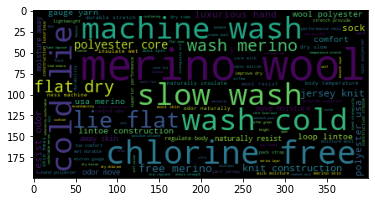

In [44]:
visualization_of_words_2(X_5)  # pull merino

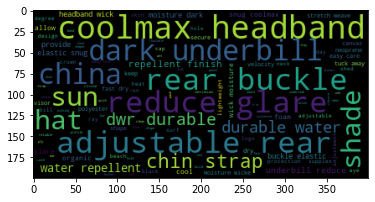

In [45]:
visualization_of_words_2(X_6)# # hat , cap

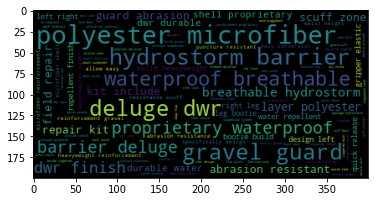

In [46]:
visualization_of_words_2(X_7)# vêtement de pêche

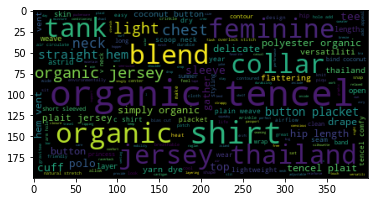

In [47]:
visualization_of_words_2(X_8) # shirt asia

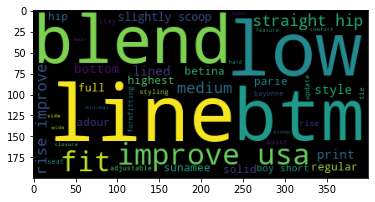

In [48]:
visualization_of_words_2(X_9)# bas

In [49]:
data.loc[X_3.index].description.tolist()

["City by the sea t-shirt - Illustrating the renaissance of sea-inspired, community living, artist Geoff McFetridge's work adorns the City-By-The-Sea T-Shirt. Lightweight, 100% organic cotton fabric is ringspun for softness. Taped shoulder seams prevent chafing. PVC- and phthalate-free inks are easier on the environment. The tee is Recyclable through the Common Threads Recycling Program.<br><br><b>Details:</b><ul> <li>Ringspun yarns for a softer hand</li> <li>Taped shoulder seams</li> <li>Screen-print inks are PVC- and phthalate-free</li></ul><br><br><b>Fabric: </b>4.4-oz 100% organic cotton. Recyclable through the Common Threads Recycling Program<br><br><b>Weight: </b>(150 g 5.2 oz)<br><br>Made in USA.",
 "Dragoons t-shirt - These dragoons have dropped their weapons in favor of big wave guns. Artist Geoff McFetridge's work creates a peaceful quiver on the Dragoons T-Shirt. The tee is made from 100% organic cotton fabric; PVC- and phthalate-free screen print inks are easier on the envi

In [50]:
data.loc[340]

description              Cap 4 zip neck - Keep your furnace stoked when...
id                                                                     342
description_bis                                             Cap 4 zip neck
description_clean        cap zip neck keep your furnace stoked when tem...
description_tokenized    [cap, neck, furnace, stoke, temperature, nose,...
nlp_ready                cap neck furnace stoke temperature nose dive w...
Name: 340, dtype: object

In [51]:
if 720  in X_1.index.tolist():
    print("ok")

In [52]:
data_labels = data

In [53]:
data_labels["label"] = modele.labels_

In [54]:
data_labels[data["label"] == 9]

,description,id,description_bis,description_clean,description_tokenized,nlp_ready,label
12,Print banded betina btm - Our fullest coverage...,13,Print banded betina btm,print banded betina btm our fullest coverage b...,"[print, band, betina, btm, full, bottom, betin...",print band betina btm full bottom betina fit h...,9
227,Print bayonne btm - The low-rise Bayonne Botto...,228,Print bayonne btm,print bayonne btm the low rise bayonne bottoms...,"[print, bayonne, btm, low, rise, bayonne, bott...",print bayonne btm low rise bayonne bottom adju...,9
255,"Solid adour btm - Adours feature a scooped, lo...",256,Solid adour btm,solid adour btm adours feature a scooped low r...,"[solid, adour, btm, adour, feature, scoop, low...",solid adour btm adour feature scoop low rise l...,9
261,Solid betina btm - Our fullest coverage bottom...,262,Solid betina btm,solid betina btm our fullest coverage bottoms ...,"[solid, betina, btm, full, bottom, betina, fit...",solid betina btm full bottom betina fit highes...,9
312,Solid paries btm - The boy-short-style Paries ...,313,Solid paries btm,solid paries btm the boy short style paries bo...,"[solid, parie, btm, boy, short, style, parie, ...",solid parie btm boy short style parie bottom l...,9
313,Solid sunamee btm - Stay-put Sunamees fit stra...,314,Solid sunamee btm,solid sunamee btm stay put sunamees fit straig...,"[solid, sunamee, btm, stay, sunamee, straight,...",solid sunamee btm stay sunamee straight hip li...,9
322,"Print paries btm - Styled like a boy short, ou...",323,Print paries btm,print paries btm styled like a boy short our p...,"[print, parie, btm, style, like, boy, short, p...",print parie btm style like boy short parie bot...,9
323,Print sunamee btm - Stay-put Sunamees fit stra...,324,Print sunamee btm,print sunamee btm stay put sunamees fit straig...,"[print, sunamee, btm, stay, sunamee, straight,...",print sunamee btm stay sunamee straight hip li...,9
360,Print adour btm - Adours have a slightly scoop...,362,Print adour btm,print adour btm adours have a slightly scooped...,"[print, adour, btm, adour, slightly, scoop, lo...",print adour btm adour slightly scoop low rise ...,9


In [55]:
data.loc[354].description

"WOMEN'S RESOLVE TROUSERS - Breathable, waterproof protection that shields from the wind and rain with ease"

In [56]:
data.columns

Index(['description', 'id', 'description_bis', 'description_clean',
       'description_tokenized', 'nlp_ready', 'label'],
      dtype='object')

In [57]:
id1 =globals()["X_"+ str(2)]
print(id1)

     abandon  ability  able  aboutaday  abrasion  abrasive  abroad  absolute  \
6        0.0      0.0   0.0        0.0       0.0       0.0     0.0       0.0   
7        0.0      0.0   0.0        0.0       0.0       0.0     0.0       0.0   
8        0.0      0.0   0.0        0.0       0.0       0.0     0.0       0.0   
9        0.0      0.0   0.0        0.0       0.0       0.0     0.0       0.0   
17       0.0      0.0   0.0        0.0       0.0       0.0     0.0       0.0   
..       ...      ...   ...        ...       ...       ...     ...       ...   
866      0.0      0.0   0.0        0.0       0.0       0.0     0.0       0.0   
867      0.0      0.0   0.0        0.0       0.0       0.0     0.0       0.0   
868      0.0      0.0   0.0        0.0       0.0       0.0     0.0       0.0   
873      0.0      0.0   0.0        0.0       0.0       0.0     0.0       0.0   
880      0.0      0.0   0.0        0.0       0.0       0.0     0.0       0.0   

     absorb  absorption  ...  zinger  z

## Partie 2 - Système de recommandation

In [58]:
"X_"+str(2)

'X_2'

In [59]:
X_1.index

Int64Index([  3,   4,  10,  11,  13,  14,  16,  22,  23,  24,
            ...
            632, 633, 636, 637, 638, 639, 640, 659, 660, 661],
           dtype='int64', length=223)

In [60]:
data.description.loc[X_1.index]

3      Alpine guide pants - Skin in, climb ice, switc...
4      Alpine wind jkt - On high ridges, steep ice an...
10     Ascensionist jkt - Our most technical soft she...
11     Atom - A multitasker's cloud nine, the Atom pl...
13     Baby micro d-luxe cardigan - Micro D-Luxe is a...
                             ...                        
639    Borderless trek zip-off pants - Made for techn...
640    Half mass - Sized for riding a bike and finely...
659    All-time shell - No need to use that morning T...
660    All-wear cargo shorts - All-Wear Cargo Shorts ...
661    All-wear shorts - Time to simplify? Our All-We...
Name: description, Length: 223, dtype: object

In [61]:
import numpy as np
labels_clean =[str(w)for w in list(set(modele.labels_)) if w !=-1]
import re 


def find_similar_items():
    item_id = 0
    item_id = input(f"Veuillez inscrire votre id de produit de 0 à {len(labels_clean)-1}:")
    
    while(item_id not in labels_clean):
        item_id = input(f"Veuillez inscrire votre id de produit de 0 à {len(labels_clean)-1}:")

   
    longeur = len(labels_clean)
    id1 =globals()["X_"+item_id] #  pour le transformer en variable
    liste = data.description.loc[id1.index].tolist()
    liste = [re.sub('<[^<]+?>', '', t) for t in liste] # permet de supprimer les balises htlm
    liste_final=np.random.choice(liste, 5, False)
    for t in liste_final: 
        print()
        print(t)
   


In [62]:
def find_similar_items_2():
    item_id = 0
    item_id = input(f"Veuillez inscrire votre id de produit de 0 à {len(labels_clean)-1}:")
    
    while(item_id not in labels_clean):
        item_id = input(f"Veuillez inscrire votre id de produit de 0 à {len(labels_clean)-1}:")

   
    longeur = len(labels_clean)
    id1 =globals()["X_"+item_id] #  pour le transformer en variable
    liste = data.description[data.label == int(item_id)].tolist()
    liste = [re.sub('<[^<]+?>', '', t) for t in liste] # permet de supprimer les balises htlm
    liste_final=np.random.choice(liste, 5, False)
    for t in liste_final: 
        print()
        print(t)
   


In [64]:
labels_clean 

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [65]:
find_similar_items_2()




Veuillez inscrire votre id de produit de 0 à 9:0

S/s sol patrol shirt - In theory, chasing Indonesian surf and bonefish for weeks on end is like going to heaven; in practice, it's really damn hot. To make sure you're covered, we've travel-tested the Short-Sleeved Sol Patrol Shirt for function-forward UV protection in sweltering spots the world over. The 2.4-oz 100% polyester ripstop fabric and side air vents are receptive to any breeze providing comfort and hardcore 30-UPF sun protection in a wide array of circumstances. Recyclable through the Common Threads Recycling Program.Details: "Lightweight, quick-drying polyester" Provides 30-UPF sun protection Double-layer collar converts to stand-up collar for extra sun protection Collar stays put and crisp thanks to hidden snaps at collar points Cooling mesh center back vent and side-arm vents facilitate flow-through ventilation Mesh-lined button-through chest pockets; inset zippered pocket at rightFabric: 2.4-oz 100% polyester ripstop with

## Modelisation du sujet :

In [63]:
svd_model = TruncatedSVD(n_components=10, algorithm='randomized', n_iter=100, random_state=122)
topic_encoded = svd_model.fit_transform(X)

In [64]:
X.shape

(882, 3738)

In [65]:
topic_encoded_df = pd.DataFrame(topic_encoded , columns = ["topic_"+ str(i) for i in range(1,11)])
topic_encoded_df["documents"] =data['nlp_ready']
topic_encoded_df

,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10,documents
0,0.236475,0.004601,-0.082908,0.125282,0.156429,0.074471,-0.027677,-0.086886,-0.049191,0.035432,active classic boxer reason boxer cult favorit...
1,0.263003,0.023777,-0.078604,0.031234,0.105392,0.109417,-0.026349,-0.006129,-0.051590,-0.050859,active sport boxer brief skin glory require mo...
2,0.262624,-0.014326,-0.090463,0.049018,0.095894,0.015401,0.028553,-0.005721,-0.026476,-0.048359,active sport brief superbreathable fly brief m...
3,0.417880,-0.072776,-0.235177,-0.185505,-0.127896,-0.100071,0.033097,0.067940,-0.045064,-0.012518,alpine guide pant skin climb ice switch rock t...
4,0.437582,-0.089575,-0.211598,-0.101678,-0.056700,-0.211806,0.123518,0.015284,-0.100822,0.055833,alpine wind jkt high ridge steep ice alpine ja...
...,...,...,...,...,...,...,...,...,...,...,...
877,0.092822,-0.111309,0.071065,0.011538,-0.045153,-0.010401,-0.168780,-0.078710,0.166481,-0.074598,berkeley sport boot combine suede upper waterp...
878,0.066818,-0.029553,-0.009149,0.007243,0.009358,-0.031557,0.121559,0.025963,0.100054,-0.076203,metallic base camp slide harnessing mesh foam ...
879,0.072344,-0.031504,-0.010345,0.006104,0.011119,-0.034346,0.128795,0.027796,0.101732,-0.081677,base camp slide harnessing mesh foam strap gri...
880,0.077036,-0.048860,0.041613,0.072414,-0.027448,0.027491,0.149160,0.035343,0.139493,-0.012797,tnf x elvira triarch slide easy comfort suppor...


In [66]:
data.shape

(882, 7)

In [67]:
liste = topic_encoded_df.columns[0:10]
liste

Index(['topic_1', 'topic_2', 'topic_3', 'topic_4', 'topic_5', 'topic_6',
       'topic_7', 'topic_8', 'topic_9', 'topic_10'],
      dtype='object')

In [68]:
maximun = max(topic_encoded_df.iloc[795,0:10].values.tolist())
maximun

0.2973763635434301

In [69]:
for i, value in enumerate(topic_encoded_df.iloc[795,0:15].values.tolist()):
    if maximun == value:
        theme = liste[i]
        print(theme)
        

topic_9


In [70]:
topic_encoded_df.iloc[1,0:10].values.tolist()

[0.2630034569633316,
 0.023776650728227936,
 -0.07860412424855753,
 0.031233601468943172,
 0.10539245016950918,
 0.1094174869710407,
 -0.026349158448226283,
 -0.006128734205608876,
 -0.051590432915093895,
 -0.050858552171865946]

In [71]:
topic_encoded_df.iloc[0,0:10].index

Index(['topic_1', 'topic_2', 'topic_3', 'topic_4', 'topic_5', 'topic_6',
       'topic_7', 'topic_8', 'topic_9', 'topic_10'],
      dtype='object')

In [72]:
dico={}
dico2={}
liste =[]

for i  in  range(len(topic_encoded_df)): # on parcours chaque ligne
    
    maximun = max(topic_encoded_df.iloc[i,0:10].values.tolist()) # on récupère la valeur maximale
    
    for i2, value in enumerate(topic_encoded_df.iloc[i,0:10].values.tolist()):
        
        index_liste= topic_encoded_df.columns[0:10]
        
        if value == maximun:
            liste=[]
            liste.append(index_liste[i2])
            liste.append(maximun)
    
            
           
            dico2[topic_encoded_df["documents"][i]] = index_liste[i2] 
            dico[topic_encoded_df["documents"][i]] = liste 
    

In [73]:
dico={}
dico2={}
liste =[]

for i  in  range(len(topic_encoded_df)): # on parcours chaque ligne
    
    maximun = max(topic_encoded_df.iloc[i,0:10].values.tolist()) # on récupère la valeur maximale
    
    for i2, value in enumerate(topic_encoded_df.iloc[i,0:10].values.tolist()):
        
        index_liste= topic_encoded_df.iloc[i,0:10].index
        
        if value == maximun:
            liste=[]
            liste.append(index_liste[i2])
            liste.append(maximun)
    
            
           
            dico2[topic_encoded_df["documents"][i]] = index_liste[i2] 
            dico[topic_encoded_df["documents"][i]] = liste 
    



In [74]:
data_svd = pd.DataFrame({"text_keys":dico.keys(), "topics_maximun": dico.values()})
data_svd ["topic"] = [ topic[0] for topic in data_svd["topics_maximun"]]
data_svd ["maximun"] = [value[1] for value in data_svd["topics_maximun"]]

data_svd#[data_svd.maximun >=0.50]

,text_keys,topics_maximun,topic,maximun
0,active classic boxer reason boxer cult favorit...,"[topic_1, 0.23647451717214418]",topic_1,0.236475
1,active sport boxer brief skin glory require mo...,"[topic_1, 0.2630034569633316]",topic_1,0.263003
2,active sport brief superbreathable fly brief m...,"[topic_1, 0.2626237644832606]",topic_1,0.262624
3,alpine guide pant skin climb ice switch rock t...,"[topic_1, 0.4178796957000444]",topic_1,0.417880
4,alpine wind jkt high ridge steep ice alpine ja...,"[topic_1, 0.43758160697882253]",topic_1,0.437582
...,...,...,...,...
791,larimer waterproof street boot waterproof ligh...,"[topic_9, 0.1943366751257794]",topic_9,0.194337
792,berkeley leather street boot combine leather u...,"[topic_9, 0.18037095234916523]",topic_9,0.180371
793,berkeley sport boot combine suede upper waterp...,"[topic_9, 0.16648118508454282]",topic_9,0.166481
794,metallic base camp slide harnessing mesh foam ...,"[topic_7, 0.12155886342739707]",topic_7,0.121559


In [75]:
t_1 = data_svd[data_svd.topic == "topic_1"]
t_1


,text_keys,topics_maximun,topic,maximun
0,active classic boxer reason boxer cult favorit...,"[topic_1, 0.23647451717214418]",topic_1,0.236475
1,active sport boxer brief skin glory require mo...,"[topic_1, 0.2630034569633316]",topic_1,0.263003
2,active sport brief superbreathable fly brief m...,"[topic_1, 0.2626237644832606]",topic_1,0.262624
3,alpine guide pant skin climb ice switch rock t...,"[topic_1, 0.4178796957000444]",topic_1,0.417880
4,alpine wind jkt high ridge steep ice alpine ja...,"[topic_1, 0.43758160697882253]",topic_1,0.437582
...,...,...,...,...
663,print heavyweight fleece sweat pant exclusivel...,"[topic_1, 0.0678129333266827]",topic_1,0.067813
666,teen resolve rain trouser breathable waterproo...,"[topic_1, 0.1189599850337417]",topic_1,0.118960
691,teen antora rain trouser waterproof seam seal ...,"[topic_1, 0.11537957615576688]",topic_1,0.115380
695,speedlight ii trouser harness way stretch quic...,"[topic_1, 0.12540456535690678]",topic_1,0.125405


In [76]:
t_2 = data_svd[data_svd.topic == "topic_2"]
t_3 = data_svd[data_svd.topic == "topic_3"]
t_4 = data_svd[data_svd.topic == "topic_4"]
t_5 = data_svd[data_svd.topic == "topic_5"]
t_6 = data_svd[data_svd.topic == "topic_6"]
t_7 = data_svd[data_svd.topic == "topic_7"]
t_8 = data_svd[data_svd.topic == "topic_8"] 
t_9 = data_svd[data_svd.topic == "topic_9"]
t_10 = data_svd[data_svd.topic == "topic_10"]



In [77]:
def visualization_of_words_5(colonne):
    texte = " ".join(colonne.values)
    wd = wordcloud.WordCloud()
    cloud = wd.generate(texte)
    plt.imshow(cloud)

In [78]:
" ".join(t_2.text_keys.values)

'city sea shirt illustrate renaissance sea inspire community living artist geoff mcfetridge work adorn city sea shirt lightweight organic    ringspun   ness tape shoulder seam prevent chafing pvc phthalate free ink easy environment tee           ringspun yarn   er hand tape shoulder seam screen print ink pvc phthalate free    organic           usa dragoon shirt dragoon drop weapon favor big wave gun artist geoff mcfetridge work create peaceful quiver dragoon shirt tee organic    pvc phthalate free screen print ink easy environment lightweight tee ringspun yarn tape shoulder seam    hand           ringspun yarn   er hand tape shoulder seam screen print ink pvc phthalate free    organic           usa fish frenzy shirt dependent free flow current salmon extraordinary cycle life persevere fish frenzy shirt washington base artist nikki mcclure work appear tee organic canvas ringspun    yarn tape shoulder seam create    hand pvc phthalate free ink easy environment shirt recyclable        rin

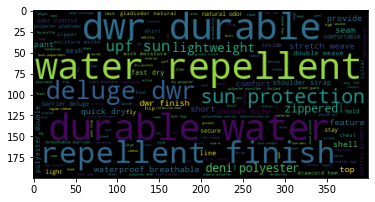

In [79]:
visualization_of_words_5(t_1.text_keys) # vêtement imperméable

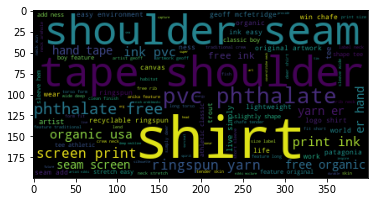

In [80]:
visualization_of_words_5(t_2.text_keys) #(t-shirt USA)

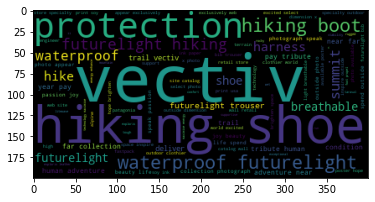

In [81]:
visualization_of_words_5(t_3.text_keys) # vectiv futurelight randonnée, poster

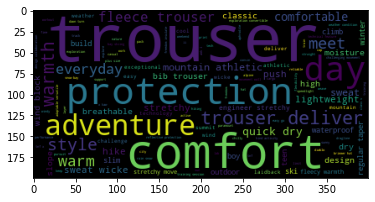

In [82]:
visualization_of_words_5(t_4.text_keys) # trousers cap comfort

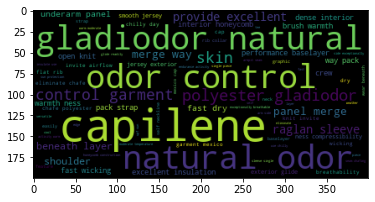

In [83]:
visualization_of_words_5(t_5.text_keys) # cap chapeau

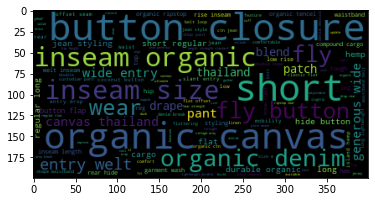

In [84]:
visualization_of_words_5(t_6.text_keys) # pantalon, short, jean

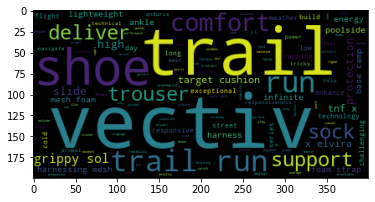

In [85]:
visualization_of_words_5(t_7.text_keys) # accessoir , chaussure, chapeau chaussette sport

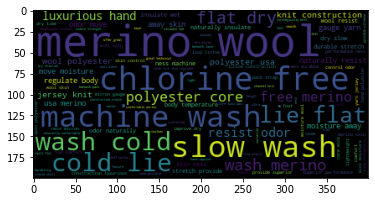

In [86]:
visualization_of_words_5(t_8.text_keys) # vêtement chausette merino

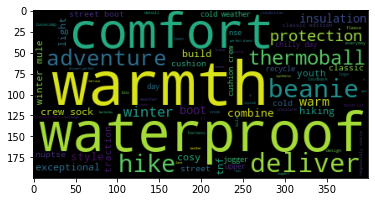

In [87]:
visualization_of_words_5(t_9.text_keys)# chaussure botte, bonnet qui tient et résiste à l'eau

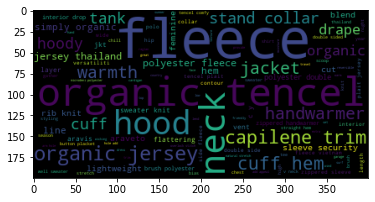

In [88]:
visualization_of_words_5(t_10.text_keys)# veste (jacket)

In [89]:
t_3.text_keys.tolist()

['go big b c poster mans trash man treasure orry grant take trash chute nelson b c year pay tribute human adventure near far collection photograph speak passion joy beauty life spend outside photo appear exclusively web site catalog wall retail store specialty outdoor clothier world excited select photo available poster hope brighten space inspire outside dimension x photo steve ogle patagonia inc    print soy ink    paper print usa',
 'lead examine life poster guanaco stand sentry patagonia chile year pay tribute human adventure near far collection photograph speak passion joy beauty life spend outside photo appear exclusively web site catalog wall retail store specialty outdoor clothier world excited select photo available poster hope brighten space inspire outside dimension x photo terri laine    print soy ink    paper contain post consumer waste print usa',
 'wyome climbing poster max factor c vedauwoo wyoming year pay tribute human adventure near far collection photograph speak pa

# Partie 3 : Modélisation du sujet

In [91]:
data_labels_new =data_labels[data_labels.label !=-1]
data_labels_new

,description,id,description_bis,description_clean,description_tokenized,nlp_ready,label
0,Active classic boxers - There's a reason why o...,1,Active classic boxers,active classic boxers there s a reason why our...,"[active, classic, boxer, reason, boxer, cult, ...",active classic boxer reason boxer cult favorit...,0
1,Active sport boxer briefs - Skinning up Glory ...,2,Active sport boxer briefs,active sport boxer briefs skinning up glory re...,"[active, sport, boxer, brief, skin, glory, req...",active sport boxer brief skin glory require mo...,0
2,Active sport briefs - These superbreathable no...,3,Active sport briefs,active sport briefs these superbreathable no f...,"[active, sport, brief, superbreathable, fly, b...",active sport brief superbreathable fly brief m...,0
3,"Alpine guide pants - Skin in, climb ice, switc...",4,Alpine guide pants,alpine guide pants skin in climb ice switch to...,"[alpine, guide, pant, skin, climb, ice, switch...",alpine guide pant skin climb ice switch rock t...,1
4,"Alpine wind jkt - On high ridges, steep ice an...",5,Alpine wind jkt,alpine wind jkt on high ridges steep ice and a...,"[alpine, wind, jkt, high, ridge, steep, ice, a...",alpine wind jkt high ridge steep ice alpine ja...,1
...,...,...,...,...,...,...,...
866,MEN'S VECTIV™ TARAVAL PEAK STREET SHOES - Engi...,870,MEN'S VECTIV™ TARAVAL PEAK STREET SHOES,men s vectiv taraval peak street shoes enginee...,"[vectiv, taraval, peak, street, shoe, engineer...",vectiv taraval peak street shoe engineer energ...,2
867,MEN'S NUPTSE CORDUROY STREET MULES - Deliverin...,871,MEN'S NUPTSE CORDUROY STREET MULES,men s nuptse corduroy street mules delivering ...,"[nuptse, corduroy, street, mule, deliver, exce...",nuptse corduroy street mule deliver exceptiona...,2
868,WOMEN'S NUPTSE METALLIC STREET MULES - Deliver...,872,WOMEN'S NUPTSE METALLIC STREET MULES,women s nuptse metallic street mules deliverin...,"[nuptse, metallic, street, mule, deliver, exce...",nuptse metallic street mule deliver exceptiona...,2
873,MEN'S LARIMER WATERPROOF STREET BOOTS - Waterp...,877,MEN'S LARIMER WATERPROOF STREET BOOTS,men s larimer waterproof street boots waterpro...,"[larimer, waterproof, street, boot, waterproof...",larimer waterproof street boot waterproof ligh...,2


# Réalisation de test de machine learning supervisé

In [92]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import  OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, roc_curve
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) # to avoid deprecation warnings
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
# setting Jedha color palette as default
pio.templates["jedha"] = go.layout.Template(
    layout_colorway=["#4B9AC7", "#4BE8E0", "#9DD4F3", "#97FBF6", "#2A7FAF", "#23B1AB", "#0E3449", "#015955"]
)
pio.templates.default = "jedha"
pio.renderers.default = "svg" # to be replaced by "iframe" if working on JULIE

In [93]:
# Separate target variable Y from features X

## Choose the columns you want to have as your features

In [94]:
print("Splitting dataset into X and y...")


X = data_labels_new['nlp_ready']
y = data_labels_new.label.values
print(y)
print("...Done.")



print(X)

Splitting dataset into X and y...
[0 0 0 1 1 6 2 2 2 2 1 1 9 1 1 1 2 2 2 0 1 1 1 0 0 1 0 0 0 0 0 2 2 0 3 1 1
 1 1 1 1 1 1 3 1 2 2 3 1 1 1 1 1 1 4 1 1 1 1 0 2 1 1 1 3 3 1 0 0 1 3 3 3 1
 8 1 3 4 1 3 3 3 6 2 0 5 5 5 0 2 1 1 1 1 5 2 5 5 5 1 1 1 1 1 3 1 1 3 2 8 3
 3 1 0 0 1 2 1 1 1 1 1 1 3 0 1 1 1 2 3 3 8 1 2 1 1 1 1 6 3 3 1 2 2 1 3 1 1
 5 6 7 3 3 7 7 1 0 1 1 1 8 1 2 1 3 1 3 3 8 2 0 0 0 0 0 1 2 0 3 3 1 1 9 2 1
 3 1 1 1 1 1 1 1 1 1 0 0 1 2 2 0 1 5 5 5 8 9 5 1 1 1 9 1 1 1 0 2 1 1 1 1 1
 2 1 1 8 0 0 0 1 1 1 1 1 1 3 4 3 2 0 8 8 8 8 2 2 9 9 1 0 1 1 2 2 5 9 9 0 0
 5 5 2 1 1 5 5 2 2 1 1 3 0 1 1 2 1 1 1 8 1 2 2 2 3 1 3 3 9 1 2 2 1 8 8 8 3
 1 1 1 1 1 1 2 1 1 8 8 1 1 1 2 2 2 4 0 1 3 1 1 8 2 1 1 1 1 1 1 8 2 2 1 4 3
 3 3 3 8 5 2 5 0 0 1 1 6 2 2 3 0 1 1 1 1 4 1 1 7 8 0 2 2 2 0 0 0 0 8 1 2 2
 2 2 2 2 0 3 7 1 2 2 2 3 3 1 8 3 0 1 2 2 0 0 1 5 1 5 1 1 0 1 1 2 2 1 1 1 1
 1 4 3 2 1 1 1 2 1 1 1 5 5 1 2 2 2 1 0 0 0 1 2 2 2 2 1 1 0 0 2 2 2 2 1 3 1
 6 2 2 1 1 1 1 1 3 3 2 2 1 1 1 1 0 2 2 0 0 0 1 1 1 0 3 3 6 1 0 1 2

In [95]:
# Divide dataset Train set & Test set 
## First we import train_test_split


print("Splitting dataset into train set and test set...")
## Then we use train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.4, 
                                                    random_state=0, 
                                                    stratify=y) # Allows you to stratify your sample. 
                                                                # Meaning, you will have the same
                                                                # proportion of categories in test 
                                                                # and train set

print("...Done.")        

Splitting dataset into train set and test set...
...Done.


# Traitement en langage numérique X train et y train

In [96]:


vectorizer1 = TfidfVectorizer(stop_words='english', smooth_idf=True)
X_train = vectorizer1.fit_transform(X_train)

X_train = X_train.toarray()

print(X_train)



[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [97]:
y_train[0:5]

array([2, 2, 2, 1, 1], dtype=int64)

# Traitement en langage numérique X test et y test

In [98]:


X_test = vectorizer1.transform(X_test)
X_test = X_test.toarray()

print(X_test)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [99]:
y_test[0:5]

array([2, 0, 1, 1, 4], dtype=int64)

In [100]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


# LogisticRegression()

In [101]:
# Train model
print("Train model...")
classifier_log = LogisticRegression()
classifier_log.fit(X_train, y_train)
print("...Done.")

Train model...
...Done.


In [102]:
# Predictions on training set
print("Predictions on train set...")
y_train_pred_log = classifier_log.predict(X_train)
print("...Done.")
print()

Predictions on train set...
...Done.



In [103]:
# Predictions on training set
print("Predictions on test set...")
y_test_pred_log = classifier_log.predict(X_test)
print("...Done.")
print()

Predictions on test set...
...Done.



f1-score on train set :  0.9355


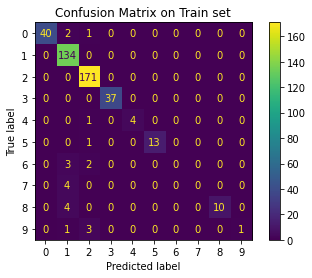

f1-score on test set :  0.8941


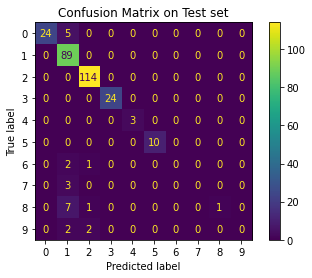

In [104]:
print("f1-score on train set : ", round(f1_score(y_train, y_train_pred_log, average='weighted'),4));


# Visualize confusion matrices
_ , ax = plt.subplots() # Get subplot from matplotlib
ax.set(title="Confusion Matrix on Train set") # Set a title that we will add into ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(classifier_log, X_train, y_train, ax=ax) # ConfusionMatrixDisplay from sklearn
plt.show()

print("f1-score on test set : ", round(f1_score(y_test, y_test_pred_log,average='weighted'),4));

_ , ax = plt.subplots() # Get subplot from matplotlib
ax.set(title="Confusion Matrix on Test set") # Set a title that we will add into ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(classifier_log, X_test, y_test, ax=ax) # ConfusionMatrixDisplay from sklearn
plt.show()

# RandomForestClassifier

In [105]:
# Training model
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV


print("Grid search...")
classifier_r = RandomForestClassifier(random_state = 0,class_weight='balanced_subsample')

# Grid of values to be tested
params = {
    'max_depth': [20, 23, 27,30],
    'n_estimators':[10,20,30,40,50,100,200],
    'min_samples_split':[2,3,4,5,6,7,8,9,10,20]
}
classifier = GridSearchCV(classifier_r, param_grid = params, scoring = 'f1_weighted', cv = 3) # cv : the number of folds to be used for CV
classifier.fit(X_train, y_train)
print("...Done.")
print("Best hyperparameters : ",classifier.best_params_)
print("Best validation f1-score : ", classifier.best_score_)

print('Training linear SVM...')

#print("Training model...")
#classifier = RandomForestClassifier(n_estimators= 20,random_state = 0,max_depth=23,min_samples_split=3,min_samples_leaf=1)#max_depth=7
#classifier.fit(X_train, y_train)
#print("...Done.")

Grid search...
...Done.
Best hyperparameters :  {'max_depth': 30, 'min_samples_split': 7, 'n_estimators': 40}
Best validation f1-score :  0.9605563325835934
Training linear SVM...


In [106]:
# Predictions on training set
print("Predictions on train set...")
y_train_pred = classifier.predict(X_train)
print("...Done.")
print()

Predictions on train set...
...Done.



In [107]:
# Predictions on training set
print("Predictions on test set...")
y_test_pred = classifier.predict(X_test)
print("...Done.")
print()

Predictions on test set...
...Done.



f1-score on train set :  0.9977


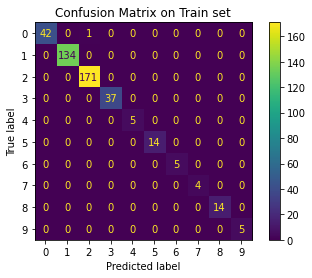

f1-score on test set :  0.975


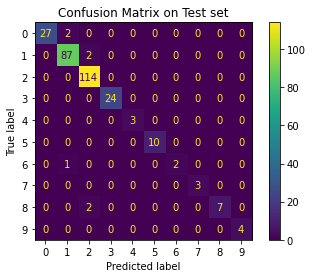

In [108]:
print("f1-score on train set : ", round(f1_score(y_train, y_train_pred, average='weighted'),4));


# Visualize confusion matrices
_ , ax = plt.subplots() # Get subplot from matplotlib
ax.set(title="Confusion Matrix on Train set") # Set a title that we will add into ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(classifier, X_train, y_train, ax=ax) # ConfusionMatrixDisplay from sklearn
plt.show()

print("f1-score on test set : ", round(f1_score(y_test, y_test_pred,average='weighted'),4));

_ , ax = plt.subplots() # Get subplot from matplotlib
ax.set(title="Confusion Matrix on Test set") # Set a title that we will add into ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, ax=ax) # ConfusionMatrixDisplay from sklearn
plt.show()

In [109]:
from sklearn.model_selection import cross_val_score

cla=  RandomForestClassifier(random_state = 0,n_estimators= 40,max_depth=30,min_samples_split=7,class_weight='balanced_subsample')

print("5-fold cross-validation...")

scores_svc_train = cross_val_score(cla, X_train, y_train, scoring = 'f1_weighted', cv=3)

print('The cross-validated f1-score is : ', scores_svc_train.mean())

print('The standard deviation is : ', scores_svc_train.std())

5-fold cross-validation...
The cross-validated f1-score is :  0.9605563325835934
The standard deviation is :  0.013355532245726017


In [110]:
print("5-fold cross-validation...")
scores_svc_test = cross_val_score(cla, X_test, y_test, scoring = 'f1_weighted', cv=3)
print('The cross-validated f1-score is : ', scores_svc_test.mean())
print('The standard deviation is : ', scores_svc_test.std())

5-fold cross-validation...
The cross-validated f1-score is :  0.9217110339207862
The standard deviation is :  0.025770002741656584


In [111]:
from sklearn.model_selection import cross_val_score

X_total = vectorizer1.transform(X)

print("5-fold cross-validation...")
scores_svc = cross_val_score(cla, X_total, y, scoring = 'f1_weighted', cv=3)
print('The cross-validated f1-score is : ', scores_svc.mean())
print('The standard deviation is : ', scores_svc.std())

5-fold cross-validation...
The cross-validated f1-score is :  0.9617967750493094
The standard deviation is :  0.013897755337054717


# Linear SVM

In [112]:
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
'linear'
print("Grid search...")
classifier_svc = SVC(kernel ='linear', probability = True,random_state = 0)

# Grid of values to be tested
params = {
    'C': [0.1, 0.5, 1.0],
    'gamma': [0.1, 1.0, 10.0]
}
svc = GridSearchCV(classifier_svc, param_grid = params, scoring = 'f1_weighted', cv = 3) # cv : the number of folds to be used for CV
svc.fit(X_train, y_train)
print("...Done.")
print("Best hyperparameters : ", svc.best_params_)
print("Best validation f1-score : ", svc.best_score_)

print('Training linear SVM...')
#svc =LinearSVC(C = 1,penalty='l2',loss='squared_hinge')
#svc = SVC(kernel = 'linear', probability = True, C = 0.95, random_state = 0) # set probability to True if you plan to use predict_proba()
#svc.fit(X_train, y_train)
#print("...Done.")

Grid search...
...Done.
Best hyperparameters :  {'C': 1.0, 'gamma': 0.1}
Best validation f1-score :  0.9570127868009309
Training linear SVM...


In [113]:
# Predictions on training set
print("Predictions on training set...")
Y_train_pred_svc = svc.predict(X_train)
print("...Done.")
print(Y_train_pred_svc)
print()



Predictions on training set...
...Done.
[2 2 2 1 1 1 1 3 2 1 2 0 2 2 0 2 1 2 6 8 1 2 2 1 2 0 3 0 0 1 8 1 1 1 0 7 5
 2 2 1 1 4 1 6 2 4 2 3 2 2 2 2 1 3 2 8 5 1 7 1 2 5 2 5 0 2 0 3 1 1 9 3 2 2
 2 0 2 5 1 2 3 1 1 2 8 1 2 2 2 8 3 8 2 2 1 1 0 1 0 0 2 1 1 3 1 1 2 1 2 1 2
 1 1 2 2 2 1 3 2 1 1 3 2 2 9 1 2 5 1 3 2 3 2 2 1 1 0 1 2 5 4 2 0 2 1 2 4 2
 2 1 2 6 0 2 2 2 1 2 3 2 2 5 1 3 0 1 2 1 1 2 1 3 2 1 2 0 1 2 5 2 2 1 2 2 2
 1 1 2 1 2 1 3 0 8 0 0 2 2 1 3 1 2 2 2 0 1 2 1 2 1 1 0 1 3 2 1 1 2 2 3 0 2
 2 2 1 1 8 2 2 1 9 1 3 2 0 1 2 8 8 0 2 1 1 2 1 3 0 2 1 2 2 2 2 2 2 1 2 2 2
 2 5 1 1 2 0 5 0 2 2 3 2 2 2 2 2 1 2 8 1 1 1 1 9 0 1 3 1 2 2 2 2 0 2 2 2 2
 3 2 4 1 2 2 2 3 1 1 1 1 2 2 2 5 1 2 1 2 2 1 2 1 1 2 1 2 1 3 2 2 1 1 1 0 1
 1 0 1 9 3 2 3 2 1 7 0 6 1 1 1 1 3 1 1 2 2 2 2 1 1 0 1 2 2 2 2 2 2 1 2 0 2
 2 0 1 0 3 2 1 8 2 8 3 1 1 1 0 3 2 1 1 3 2 5 5 1 0 2 2 2 1 2 1 1 2 1 2 0 2
 1 1 2 2 2 2 2 2 1 7 2 3 8 1 2 1 0 0 1 1 1 1 3 3 2]



In [114]:
# It's also possible to get the probabilities estimated by the model:
print("Probabilities on training set...")
Y_train_proba_svc = svc.predict_proba(X_train)
print("...Done.")
print(Y_train_proba_svc)
print()

Probabilities on training set...
...Done.
[[0.00591627 0.00294062 0.97707373 ... 0.00127137 0.00249229 0.00199843]
 [0.00463224 0.00403184 0.97735378 ... 0.00138732 0.00273994 0.00178367]
 [0.00907626 0.00550003 0.96627965 ... 0.00154448 0.00333025 0.00206603]
 ...
 [0.01243361 0.01657343 0.01571772 ... 0.00465218 0.01539344 0.0060441 ]
 [0.01177894 0.01614682 0.00879445 ... 0.00470208 0.02013183 0.00578544]
 [0.00578041 0.00475068 0.97283762 ... 0.00148778 0.00339986 0.00200408]]



In [115]:
# Predictions on test set
print("Predictions on test set...")
Y_test_pred_svc = svc.predict(X_test)
print("...Done.")
print(Y_test_pred_svc)
print()



Predictions on test set...
...Done.
[2 0 1 1 4 2 2 2 3 2 2 2 2 2 2 2 1 8 8 2 1 1 1 1 7 2 2 3 1 2 1 6 1 0 1 2 2
 5 2 2 1 1 3 2 2 1 1 1 2 4 1 1 1 2 1 1 3 2 1 8 2 0 1 1 2 1 1 2 3 5 2 0 1 2
 1 1 1 1 4 2 1 2 1 2 3 2 2 5 1 2 2 2 2 2 2 1 1 2 2 9 7 0 3 0 3 2 3 2 2 1 1
 2 0 0 2 2 2 5 2 0 2 0 2 2 3 2 2 1 1 0 0 1 2 1 1 1 0 2 1 3 2 2 1 0 1 1 1 0
 0 0 5 3 0 5 0 1 2 8 7 3 2 9 1 3 2 2 1 3 1 2 0 2 2 8 2 1 1 2 6 8 2 2 0 5 1
 0 2 1 2 2 1 1 2 1 1 1 5 3 2 1 2 1 1 2 2 2 1 1 0 1 1 3 2 1 1 2 2 1 2 2 2 2
 8 2 2 8 1 0 1 1 2 1 1 0 3 1 2 2 1 1 9 1 1 2 2 2 2 2 2 1 5 2 2 2 0 1 3 2 6
 0 3 8 1 3 2 2 2 2 2 1 1 1 5 2 3 3 1 2 2 9 2 2 1 1 2 3 2 2]



In [116]:
# It's also possible to get the probabilities estimated by the model:
print("Probabilities on test set...")
Y_test_proba_svc = svc.predict_proba(X_test)
print("...Done.")
print(Y_test_proba_svc)
print()

Probabilities on test set...
...Done.
[[0.00430209 0.00215101 0.9823442  ... 0.00157302 0.00195468 0.00131436]
 [0.94899876 0.01076162 0.00217478 ... 0.00438694 0.00703305 0.00537274]
 [0.00659043 0.96824268 0.0031824  ... 0.00265849 0.00234232 0.00122694]
 ...
 [0.00511431 0.00365846 0.00341244 ... 0.00309217 0.00727387 0.00321577]
 [0.009307   0.00446067 0.96928751 ... 0.00143309 0.00313006 0.00203668]
 [0.00567194 0.00411526 0.97626845 ... 0.00129195 0.00307782 0.00151624]]



f1-score on train set :  0.9952


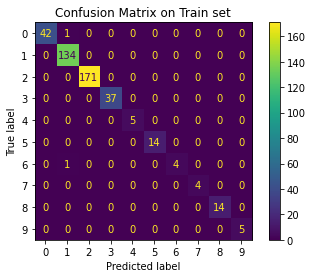

f1-score on test set :  0.993


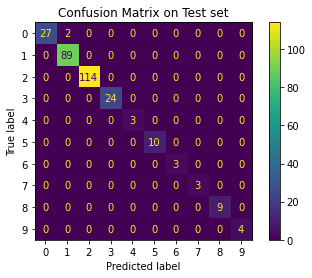

In [117]:
print("f1-score on train set : ", round(f1_score(y_train, Y_train_pred_svc, average='weighted'),4));


# Visualize confusion matrices
_ , ax = plt.subplots() # Get subplot from matplotlib
ax.set(title="Confusion Matrix on Train set") # Set a title that we will add into ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(svc, X_train, y_train, ax=ax) # ConfusionMatrixDisplay from sklearn
plt.show()

print("f1-score on test set : ", round(f1_score(y_test, Y_test_pred_svc,average='weighted'),4));

_ , ax = plt.subplots() # Get subplot from matplotlib
ax.set(title="Confusion Matrix on Test set") # Set a title that we will add into ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(svc, X_test, y_test, ax=ax) # ConfusionMatrixDisplay from sklearn
plt.show()

In [118]:
from sklearn.model_selection import cross_val_score

print("5-fold cross-validation...")
scores_svc_train = cross_val_score(svc, X_train, y_train, scoring = 'f1_weighted', cv=3)
print('The cross-validated f1-score is : ', scores_svc_train.mean())
print('The standard deviation is : ', scores_svc_train.std())

5-fold cross-validation...


C:\Users\vanes\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning:

The least populated class in y has only 2 members, which is less than n_splits=3.



The cross-validated f1-score is :  0.9570127868009309
The standard deviation is :  0.019860640936960924


In [119]:
print("5-fold cross-validation...")
scores_svc_test = cross_val_score(classifier, X_test, y_test, scoring = 'f1_weighted', cv=3)
print('The cross-validated f1-score is : ', scores_svc_test.mean())
print('The standard deviation is : ', scores_svc_test.std())

5-fold cross-validation...


C:\Users\vanes\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning:

The least populated class in y has only 2 members, which is less than n_splits=3.

C:\Users\vanes\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning:

The least populated class in y has only 2 members, which is less than n_splits=3.

C:\Users\vanes\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning:

The least populated class in y has only 2 members, which is less than n_splits=3.



The cross-validated f1-score is :  0.9168692984346917
The standard deviation is :  0.030232919630472654


In [120]:
from sklearn.model_selection import cross_val_score

X_total = vectorizer1.transform(X)

print("5-fold cross-validation...")
scores_svc = cross_val_score(svc, X_total, y, scoring = 'f1_weighted', cv=3)
print('The cross-validated f1-score is : ', scores_svc.mean())
print('The standard deviation is : ', scores_svc.std())

5-fold cross-validation...
The cross-validated f1-score is :  0.9778746963161864
The standard deviation is :  0.011332147261300215


In [126]:
!pip install --upgrade scikit-learn

In [121]:
from sklearn.model_selection import GridSearchCV
print("Grid search...")
classifier_svc = SVC(kernel = 'rbf', probability = True,random_state = 0)

# Grid of values to be tested
params = {
    'C': [0.1, 1.0, 10.0],
    'gamma': [0.1, 1.0, 10.0]
}
gridsearch = GridSearchCV(classifier_svc, param_grid = params, scoring = 'f1_weighted', cv = 3) # cv : the number of folds to be used for CV
gridsearch.fit(X_train, y_train)
print("...Done.")
print("Best hyperparameters : ", gridsearch.best_params_)
print("Best validation f1-score : ", gridsearch.best_score_)

Grid search...
...Done.
Best hyperparameters :  {'C': 10.0, 'gamma': 0.1}
Best validation f1-score :  0.9642574742507873


In [122]:
# Predictions on training set
print("Predictions on training set...")
Y_train_pred = gridsearch.predict(X_train)
print("...Done.")
print(Y_train_pred)
print()

# It's also possible to get the probabilities estimated by the model:
print("Probabilities on training set...")
Y_train_proba = gridsearch.predict_proba(X_train)
print("...Done.")
print(Y_train_proba)
print()

Predictions on training set...
...Done.
[2 2 2 1 1 1 1 3 2 1 2 0 2 2 0 2 1 2 6 8 0 2 2 1 2 0 3 0 0 1 8 1 1 1 0 7 5
 2 2 1 1 4 1 6 2 4 2 3 2 2 2 2 1 3 2 8 5 1 7 1 2 5 2 5 0 2 0 3 1 1 9 3 2 2
 2 0 2 5 1 2 3 1 1 2 8 1 2 2 2 8 3 8 2 2 1 1 0 1 0 0 2 1 1 3 1 1 2 1 2 1 2
 1 1 2 2 2 1 3 2 1 1 3 2 2 9 1 2 5 1 3 2 3 2 2 1 1 0 1 2 5 4 2 0 2 1 2 4 2
 2 1 2 6 0 2 2 2 1 2 3 2 2 5 1 3 0 1 2 1 1 2 1 3 2 1 2 0 1 2 5 2 2 1 2 2 2
 1 1 2 1 2 1 3 0 8 0 0 2 2 1 3 1 2 2 2 0 1 2 1 2 1 1 0 1 3 2 1 1 2 2 3 0 2
 2 2 1 1 8 2 2 1 9 1 3 2 0 1 2 8 8 0 2 1 1 2 1 3 0 2 6 2 2 2 2 2 2 1 2 2 2
 2 5 1 1 2 0 5 0 2 2 3 2 2 2 2 2 1 2 8 1 1 1 1 9 0 1 3 1 2 2 2 2 0 2 2 2 2
 3 2 4 1 2 2 2 3 1 1 1 1 2 2 2 5 1 2 1 2 2 1 2 1 1 2 1 2 1 3 2 2 1 1 1 0 1
 1 0 1 9 3 2 3 2 1 7 0 6 1 1 1 1 3 1 1 2 2 2 2 1 1 0 1 2 2 2 2 2 2 1 2 0 2
 2 0 1 0 3 2 1 8 2 8 3 1 1 1 0 3 2 1 1 3 2 5 5 1 0 2 2 2 1 2 1 1 2 1 2 0 2
 1 1 2 2 2 2 2 2 1 7 2 3 8 1 2 1 0 0 1 1 1 1 3 3 2]

Probabilities on training set...
...Done.
[[0.00572259 0.00294789 0.97701162 ... 0

In [123]:
# Predictions on test set
print("Predictions on test set...")
Y_test_pred = gridsearch.predict(X_test)
print("...Done.")
print(Y_test_pred)
print()

# It's also possible to get the probabilities estimated by the model:
print("Probabilities on test set...")
Y_test_proba = gridsearch.predict_proba(X_test)
print("...Done.")
print(Y_test_proba)
print()

Predictions on test set...
...Done.
[2 0 1 1 4 2 2 2 3 2 2 2 2 2 2 2 1 8 8 2 1 1 1 1 7 2 2 3 1 2 1 6 1 0 1 2 2
 5 2 2 1 1 3 2 2 1 1 1 2 4 1 1 1 2 1 1 3 2 1 8 2 0 1 1 2 1 1 2 3 5 2 0 1 2
 1 1 1 1 4 2 1 2 1 2 3 2 2 5 1 2 2 2 2 2 2 1 1 2 2 9 7 0 3 0 3 2 3 2 2 1 1
 2 0 0 2 2 2 5 2 0 2 0 2 2 3 2 2 1 1 0 0 1 2 1 1 1 0 2 1 3 2 2 1 0 1 1 1 0
 0 0 5 3 0 5 0 1 2 8 7 3 2 9 1 3 2 2 1 3 1 2 0 2 2 8 2 1 1 2 6 8 2 2 0 5 1
 0 2 1 2 2 1 1 2 1 1 1 5 3 2 1 2 1 1 2 2 2 1 1 0 1 1 3 2 1 1 2 2 1 2 2 2 2
 8 2 2 8 1 0 1 1 2 1 1 0 3 1 2 2 1 1 9 1 1 2 2 2 2 2 2 1 5 2 2 2 0 1 3 2 6
 0 3 8 1 3 2 2 2 2 2 1 1 1 5 2 3 3 1 2 2 9 2 2 1 1 2 3 2 2]

Probabilities on test set...
...Done.
[[0.0044506  0.00216115 0.98189984 ... 0.00158052 0.00196666 0.00141442]
 [0.95449357 0.00640172 0.00201714 ... 0.00432776 0.00661523 0.00523014]
 [0.0063025  0.96898743 0.00306948 ... 0.00259486 0.00227579 0.00134946]
 ...
 [0.00512    0.00372116 0.00333395 ... 0.00310634 0.00684123 0.00315867]
 [0.00830765 0.00435162 0.97084911 ... 0.00

f1-score on train set :  1.0


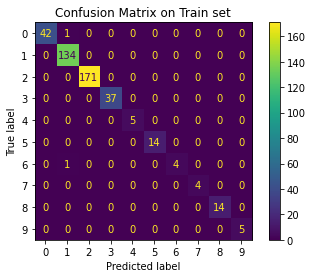

f1-score on test set :  0.993


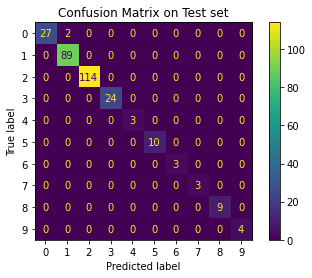

In [124]:
print("f1-score on train set : ", round(f1_score(y_train, Y_train_pred, average='weighted'),4));


# Visualize confusion matrices
_ , ax = plt.subplots() # Get subplot from matplotlib
ax.set(title="Confusion Matrix on Train set") # Set a title that we will add into ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(svc, X_train, y_train, ax=ax) # ConfusionMatrixDisplay from sklearn
plt.show()

print("f1-score on test set : ", round(f1_score(y_test, Y_test_pred,average='weighted'),4));

_ , ax = plt.subplots() # Get subplot from matplotlib
ax.set(title="Confusion Matrix on Test set") # Set a title that we will add into ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(svc, X_test, y_test, ax=ax) # ConfusionMatrixDisplay from sklearn
plt.show()

In [125]:
from sklearn.model_selection import cross_val_score

classifi= SVC(kernel = 'rbf', probability = True,C= 10.0, gamma = 0.1,random_state = 0)

print("3-fold cross-validation...")
scores_svc_train = cross_val_score(classifi, X_train, y_train, scoring = 'f1_weighted', cv=3)
print('The cross-validated f1-score is : ', scores_svc_train.mean())
print('The standard deviation is : ', scores_svc_train.std())

3-fold cross-validation...
The cross-validated f1-score is :  0.9642574742507873
The standard deviation is :  0.01634377889653829


In [126]:
print("3-fold cross-validation...")
scores_svc_test = cross_val_score(classifi, X_test, y_test, scoring = 'f1_weighted', cv=3)
print('The cross-validated f1-score is : ', scores_svc_test.mean())
print('The standard deviation is : ', scores_svc_test.std())

3-fold cross-validation...
The cross-validated f1-score is :  0.9342896473408892
The standard deviation is :  0.049296406215989796


In [127]:
X_total = vectorizer1.transform(X)

print("3-fold cross-validation...")
scores_svc = cross_val_score(classifi,X_total, y, scoring = 'f1_weighted', cv=3)
print('The cross-validated f1-score is : ', scores_svc.mean())
print('The standard deviation is : ',  scores_svc.std())

3-fold cross-validation...
The cross-validated f1-score is :  0.9777312547128059
The standard deviation is :  0.011477733878632415


In [128]:
data.columns

Index(['description', 'id', 'description_bis', 'description_clean',
       'description_tokenized', 'nlp_ready', 'label'],
      dtype='object')

In [129]:
data.description[data.label == 1].tolist()

['Alpine guide pants - Skin in, climb ice, switch to rock, traverse a knife-edge ridge and boogie back down - these durable, weather-resistant and breathable soft-shell pants keep stride on every mountain endeavor. The midweight stretch-woven polyester won\'t restrict your moves, and the brushed interior maintains next-to-skin comfort. A 2-way zippered fly keeps things easy with a harness on, and the gusseted, zippered cuffs have 2-position snaps and tie-down loops. With water-resistant zippered pockets: two front, two thigh, one back hip. Recyclable through the Common Threads Recycling Program.<br><br><b>Details:</b><ul> <li>Durable stretch-woven polyester (47% recycled) with DWR (durable water repellent) finish is water- and wind-resistant and highly breathable</li> <li>Brushed interior for next-to-skin comfort</li> <li>Waistband has belt loops and elastic on back</li> <li>2-way zippered fly</li> <li>"External pockets: two front slash, two glued-on thigh, one back hip - all with high

In [133]:
def nlp_ready_go(word):


    word_clean =word.replace(r"<br>|</br>|<li>|</li|<ul>|</ul>|<b>|</b>|oz", " ")

#data['description_clean'] = data['description_clean'].str.replace(r"[^A-Za-z0-9]+", " ")
    word_clean = word_clean.replace(r"[^A-Za-z]+", " ")
    word_clean = word_clean.replace(r"recycling|recycled|common|Threads|threads|Common|Recyclable|Recycling|Recycled|Fabric|fabric|soft|Soft", " ")
    word_clean = word_clean.lower()
    word_clean = word_clean.replace(r" t | h ", " ")
    # tokenization
    word_clean_nlp = nlp(word_clean)
# remove stop-words

    word_clean_nlp = [token.lemma_ for token in word_clean_nlp if token.text not in STOP_WORDS]
    word_clean_nlp_ready =[' '.join(word_clean_nlp)]
    
    return word_clean_nlp_ready

#[' '.join(data['description_tokenized'].iloc[i]) for i in range(len(data['description_tokenized']))]

In [137]:
nlp_ready_go("jacket")

['jacket']

In [161]:
word_clean ="jacket coll".replace(r"<br>|</br>|<li>|</li|<ul>|</ul>|<b>|</b>|oz", " ")

word_clean_nlp =[token.lemma_ for token in nlp(word_clean) if token.text not in STOP_WORDS]

word_clean_nlp_ready =[' '.join(word_clean_nlp)]
word_clean_nlp_ready 

['jacket coll']

In [135]:
import numpy as np
labels_clean =[str(w)for w in list(set(modele.labels_)) if w !=-1]
import re 


def find_similar_items_new():
    item = ""
   
    
    
    while(item == ""):
        item = input(f"Veuillez inscrire le nom du produit:")

   
  
    
    item = nlp_ready_go(item)
    
    item = vectorizer1.transform(item).toarray()
    target = classifier.predict(item)[0]
    liste = data.description[data.label == target ].tolist()
    liste = [re.sub('<[^<]+?>', '', t) for t in liste] # permet de supprimer les balises htlm
    liste_final=np.random.choice(liste, 5, False)
    for t in liste_final: 
        print()
        print(t)
   


In [138]:
find_similar_items_new()

Veuillez inscrire le nom du produit:1

BOYS' EXPLORATION TROUSERS - Designed to be his most comfortable trousers yet

WOMEN'S VECTIV™ TARAVAL FUTURELIGHT™ HIKING SHOES - Breathable, waterproof FUTURELIGHT™ protection for wet mountain conditions

BONES RECYCLED BEANIE - Easy-going style, comfort and warmth for laidback adventures

YOUTH FASTPACK WATERPROOF HIKING SHOES - Delivering waterproof, cushioned support on wet, muddy hikes over challenging terrain

MEN'S EXPLORATION REGULAR TAPERED TROUSERS - Engineered with stretchy fabric that moves with you


In [ ]:
def find_similar_items_new():
    item = ""
    item = input(f"Veuillez inscrire le nom du produit:")
    
    
    while(item == ""):
        item = input(f"Veuillez inscrire le nom du produit:")

   
    print(item)

In [139]:
!pip install jupyter-dash

In [110]:
from jupyter_dash import JupyterDash
import pandas as pd
import dash
from dash import html
#import dash_core_components as dcc
import plotly.express as px
from dash import Dash, dash_table
from dash import dcc

import plotly.express as px

# Instanciate our web application. This is the big class that will call
# in order to run the server.


external_stylesheets = ['assets/dash_north.css']


app = JupyterDash(__name__,external_stylesheets=external_stylesheets)

# Here our layout i.e. how our page is going to look.
app.layout = html.Div(children=[
    # Display H1 title.
    
    html.Div(className='banniere', children=[
    html.H1(children="Clothing recommendation"),
    
    
    html.Img(src ="https://search.alpinstore.com/data/media/47/2023-01-01_13-52-06_the-north-face-logo-1966.png", style ={"width": "150px", "heigth ": "30px", "margin":"auto}"})]),

    html.Div(className='body', children=[
    html.P(children="Looking for clothes. Welcome to the site. ",className='presentation'),
     html.P(children="Your dream is here !",className='presentation'),
    html.Br(),
    
     html.H2(children="Welcome"),
    
    html.Br(),
    
    
    html.P(children="Welcome to our clothing recommendation system!", className='summary'),
    
   html.Br(), 
    
    html.P(children="Passionate about fashion and nature, we want to offer you the best.", className='summary'),
    
    html.Br(),
    
   html.P(children= "Whatever the weather, sunny, cloudy, rainy  you will find the clothes you need.", className='summary'),
    
    
    html.Br(),
    
    html.P(children="Whatever your activities, in the mountains, in the country or in the city,or at the sea, your clothes will be fashionable.", className='summary'),
    
    
    html.Br(),
    
    html.P(children="So click below to discover your future clothes!",className='summary'),
    
    html.Br(),
    
    
    html.H2(children= "Discover our products"),
    
    html.Br(),
    
    html.Br(),

    dcc.Dropdown(id = 'products',
   options={
        '0': 'Sun protection',
        '1': 'Waterproof clothing',
        '2': 'Hiking',
        '3': 'Usa shirt',
        '4': 'Poster, photo',
        '5': 'Merino garment',
        '6': 'Cap, hat',
        '7': 'Fishing clothes',
        '8': 'Asia shirt',
        '9': "Low"
       
       
   },value='0',clearable=False) ,
    
    
    
    html.Div(id='name_poke')


])])



@app.callback(
    dash.dependencies.Output('name_poke', 'children'),
    dash.dependencies.Input('products', "value")
)
def update_output(resultat):
   
    liste = data.description[data.label == int(resultat)].tolist()
    liste = [re.sub('<[^<]+?>', '', t) for t in liste] # permet de supprimer les balises htlm
    liste_final=np.random.choice(liste, 5, False)
    liste_final=["\n"+"\n"+l for l in liste_final]
    return  html.Div(children = [html.P(liste_final[0]), html.Br(),html.P(liste_final[1]),html.Br(),html.P(liste_final[2]),html.Br(),html.P(liste_final[3]),html.Br(),html.P(liste_final[4])]) 
    

In [111]:
if __name__ == "__main__":
    # Run the server!
    app.run_server(debug=True, port = 8051)

Dash app running on http://127.0.0.1:8051/


In [172]:
liste =["oii tpo","iooiçià", "iuuoiu"]
"\n ".join(liste)

'oii tpo\n iooiçià\n iuuoiu'

In [204]:
liste =["oii tpo","iooiçià", "iuuoiu"]

liste= ["\n"+l for l in liste]
    

In [202]:
print("bla\tbla")

bla	bla


In [205]:
for n in liste:
    print(n)


oii tpo

iooiçià

iuuoiu


In [213]:
help(dash.html.H1)

Help on class H1 in module dash.html.H1:

class H1(dash.development.base_component.Component)
 |  H1(children=None, id=undefined, n_clicks=undefined, n_clicks_timestamp=undefined, key=undefined, accessKey=undefined, className=undefined, contentEditable=undefined, contextMenu=undefined, dir=undefined, draggable=undefined, hidden=undefined, lang=undefined, role=undefined, spellCheck=undefined, style=undefined, tabIndex=undefined, title=undefined, loading_state=undefined, **kwargs)
 |  
 |  A H1 component.
 |  H1 is a wrapper for the <h1> HTML5 element.
 |  For detailed attribute info see:
 |  https://developer.mozilla.org/en-US/docs/Web/HTML/Element/h1
 |  
 |  Keyword arguments:
 |  
 |  - children (a list of or a singular dash component, string or number; optional):
 |      The children of this component.
 |  
 |  - id (string; optional):
 |      The ID of this component, used to identify dash components in
 |      callbacks. The ID needs to be unique across all of the components
 |   